In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("/Users/piyush/projects/ViDA-SSL/")

In [46]:
from os.path import join
from tqdm import tqdm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

import torch

from datasets.ntu import NTU
from datasets.epic import EPIC
from datasets.something_something import SomethingSomething
from datasets.finegym import FineGym
from datasets.ucf import UCF
from datasets.kinetics import Kinetics

### Compare `Kinetics` with `UCF`

In [9]:
kinetics = Kinetics(data_dir="../data/Kinetics-400/")
kinetics_labels = kinetics._load_annotations(filename="kinetics_400_labels.csv")

In [11]:
ucf = UCF(data_dir="../data/UCF-101/")
ucf_labels = ucf._load_annotations(filename="classes_cleaned.txt")

In [12]:
len(kinetics_labels), len(ucf_labels)

(400, 101)

In [15]:
overlap = pd.read_csv("kinetics_vs_ucf.tsv", delimiter="\t")

In [19]:
count_matrix = np.zeros((len(ucf_labels), len(kinetics_labels)))

In [21]:
count_matrix.shape

(101, 400)

In [31]:
"biking through snow" in kinetics_labels.values()

True

In [33]:
for i in range(len(ucf_labels)):
    closest_in_kinetics = overlap["Closest actions in Kinetics"].apply(lambda x: x.split(", ")).iloc[i]
    
    for act in closest_in_kinetics:
        if "," in act:
            act = act.split(",")[-1]
            if act in kinetics_labels.values():
                j = list(kinetics_labels.values()).index(act)
                count_matrix[i, j] += 1

In [39]:
df = pd.DataFrame(count_matrix, index=list(ucf_labels.values()), columns=list(kinetics_labels.values()))

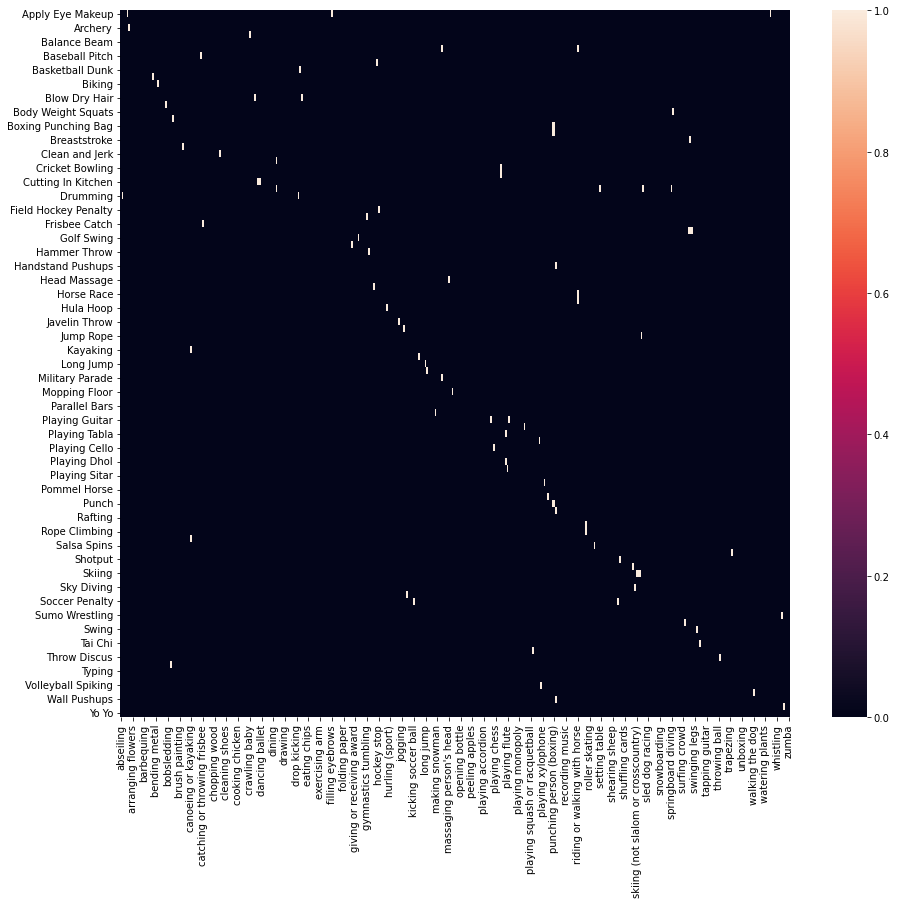

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(15, 13))
sns.heatmap(df, ax=ax)
plt.show()

### Compare `NTU` with `UCF`

In [11]:
ucf = UCF(data_dir="../data/UCF-101/")
ucf_labels = ucf._load_annotations(filename="classes_cleaned.txt")

In [57]:
ntu = NTU(data_dir="../data/NTU/")
ntu_labels = ntu._load_annotations(filename="class_labels.txt")
ntu_labels = {k:v for k, v in ntu_labels.items() if int(k.split("A")[-1]) <= 60}

In [58]:
len(ucf_labels), len(ntu_labels)

(101, 60)

In [66]:
overlap = pd.read_csv("ntu_vs_ucf.tsv", delimiter="\t")

In [67]:
count_matrix = np.zeros((len(ntu_labels), len(ucf_labels)))

In [68]:
count_matrix.shape

(60, 101)

In [84]:
for i in range(len(ntu_labels)):
    closest_in_ucf = overlap["Closest actions in UCF"].apply(lambda x: x.split(", ")).iloc[i]
    
    for act in closest_in_ucf:
        if "," in act:
            act = act.split(",")[-1]
            if act.title() in ucf_labels.values():
                j = list(ucf_labels.values()).index(act.title())
                count_matrix[i, j] += 1

In [86]:
df = pd.DataFrame(count_matrix, index=list(ntu_labels.values()), columns=list(ucf_labels.values()))

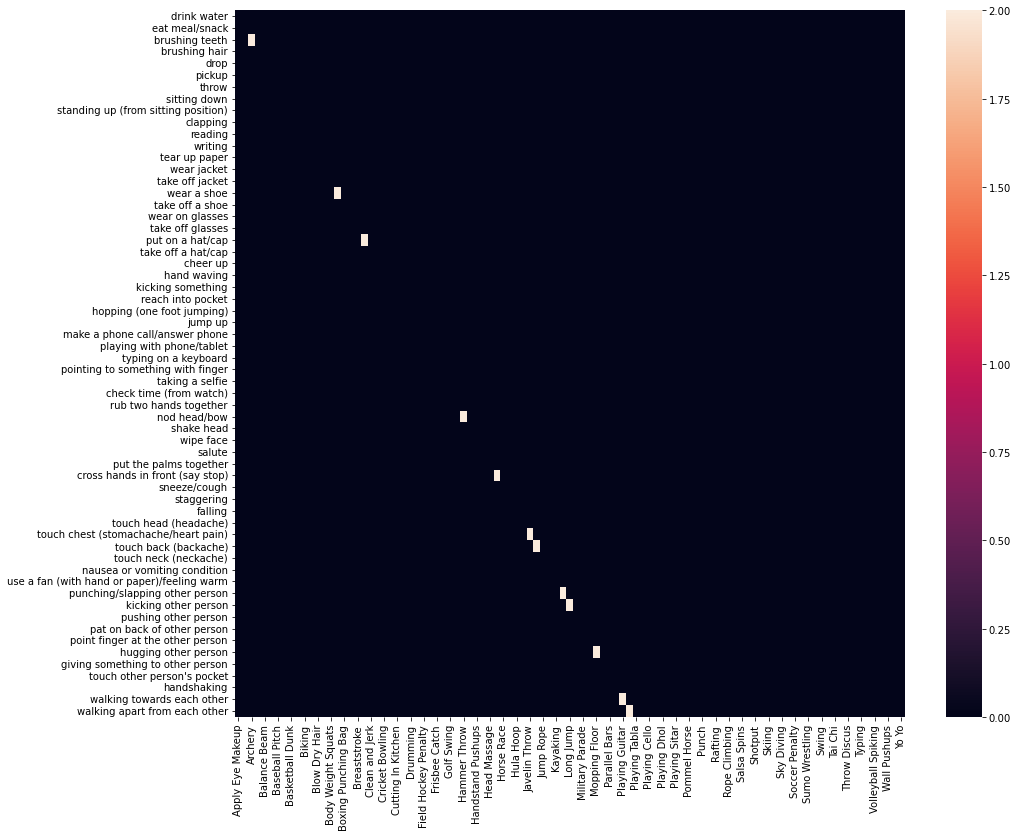

In [87]:
fig, ax = plt.subplots(1, 1, figsize=(15, 13))
sns.heatmap(df, ax=ax)
plt.show()

In [88]:
np.sum(count_matrix)

24.0